In [21]:
import numpy as np
import pandas as pd

In [22]:
#CSVを読み込む
df = pd.read_csv('data/ch2_scores_em.csv', index_col='生徒番号')
df.head()

,英語,数学
生徒番号,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [23]:
#英語の点数を配列に入れる
en_scores = np.array(df['英語'])[:10]
en_scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58], dtype=int64)

In [24]:
#数学の点数を配列に入れる
ma_scores = np.array(df['数学'])[:10]
ma_scores

array([65, 80, 63, 63, 76, 60, 81, 66, 78, 82], dtype=int64)

In [25]:
#データフレームにセットする
scores_df = pd.DataFrame({'英語':en_scores, '数学':ma_scores}, index=pd.Index(['A','B','C','D','E','F','G','H','I','J'], name='生徒'))
scores_df

,英語,数学
生徒,,
A,42,65
B,69,80
C,56,63
D,41,63
E,57,76
F,48,60
G,65,81
H,49,66
I,65,78


In [26]:
#共分散を求めるにあたり各平均を求める
summary_df = scores_df.copy()
en_mean = summary_df['英語'].mean()
en_mean

55.0

In [27]:
ma_mean = summary_df['数学'].mean()
ma_mean

71.4

In [28]:
#共分散を求めるにあたり各偏差を求める
summary_df['英語の偏差'] = summary_df['英語'] - en_mean
summary_df['数学の偏差'] = summary_df['数学'] - ma_mean
summary_df['偏差同士の積'] = summary_df['英語の偏差'] * summary_df['数学の偏差']
summary_df

,英語,数学,英語の偏差,数学の偏差,偏差同士の積
生徒,,,,,
A,42,65,-13.0,-6.4,83.2
B,69,80,14.0,8.6,120.4
C,56,63,1.0,-8.4,-8.4
D,41,63,-14.0,-8.4,117.6
E,57,76,2.0,4.6,9.2
F,48,60,-7.0,-11.4,79.8
G,65,81,10.0,9.6,96.0
H,49,66,-6.0,-5.4,32.4
I,65,78,10.0,6.6,66.0


In [29]:
#偏差同士の積の平均 正の相関があると思われる
deviation_mean = summary_df['偏差同士の積'].mean()
deviation_mean

62.8

In [30]:
#共分散
cov_mat = np.cov(en_scores, ma_scores, ddof=0)
cov_mat

array([[86.  , 62.8 ],
       [62.8 , 68.44]])

In [31]:
#英語の標本分散
np.var(en_scores, ddof=0)

86.0

In [32]:
#数学の標本分散
np.var(ma_scores, ddof=0)

68.44000000000001

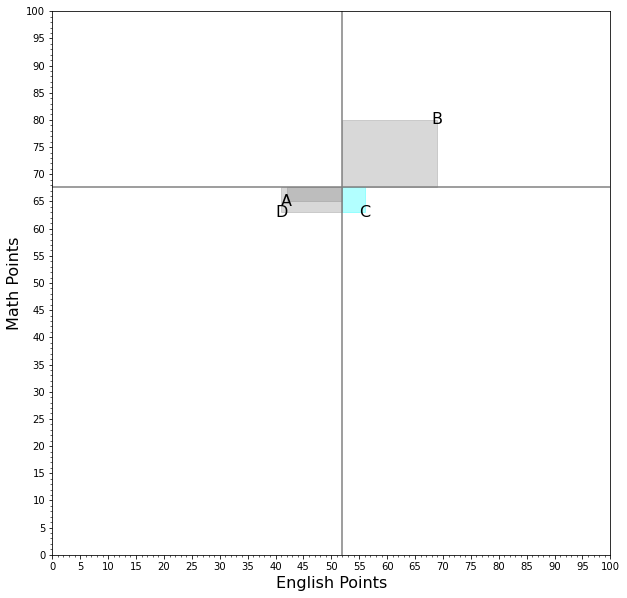

In [34]:
import matplotlib.pyplot as plt
from plot_util import plot_cov_interact

#点数の散布図と符号付き面積
plot_cov_interact(en_scores, ma_scores)